In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def plotting(path='quasipois_vary_sparsity.csv'):
    oper_char_df = pd.read_csv(path)

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

    print("Mean coverage rate/length:")
    print(oper_char_df.groupby(['sparsity size', 'method']).mean())

    palette ={"MLE": "palegreen", "Data splitting": "skyblue", "Naive": "lightcoral"}

    cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df["sparsity size"],
                           hue=oper_char_df["method"],
                           palette=palette,
                           orient="v", ax=ax1,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0.6, 1.05)
    # plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    # ax1.set_ylabel("")  # remove y label, but keep ticks

    len_plot = sns.boxplot(y=oper_char_df["avg length"],
                           x=oper_char_df["sparsity size"],
                           hue=oper_char_df["method"],
                           palette=palette,
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                           x=oper_char_df["sparsity size"],
                           hue=oper_char_df["method"],
                           palette=palette,
                           orient="v", ax=ax3,
                           linewidth=1)
    F1_plot.set(title='F1 score')

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()

    plt.show()

def plotting_separate(path='quasipois_vary_sparsity.csv'):
    oper_char_df = pd.read_csv(path)

    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    palette ={"MLE": "palegreen", "Data splitting": "skyblue", "Naive": "lightcoral"}

    def plot_naive():
        naive_flag = oper_char_df["method"] == 'Naive'
        print(np.sum(naive_flag))

        print("Mean coverage rate/length:")
        print(oper_char_df.groupby(['sparsity size', 'method']).mean())

        cov_plot = sns.boxplot(y=oper_char_df.loc[naive_flag, "coverage rate"],
                               x=oper_char_df.loc[naive_flag, "beta size"],
                               # hue=oper_char_df["method"],
                               # palette="pastel",
                               color='lightcoral',
                               orient="v",
                               linewidth=1)
        cov_plot.set(title='Coverage of Naive Inference')
        cov_plot.set_ylim(0.5, 1.05)
        # plt.tight_layout()
        cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
        plt.show()

    def plot_comparison():
        cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                               x=oper_char_df["sparsity size"],
                               hue=oper_char_df["method"],
                               palette=palette,
                               orient="v",
                               linewidth=1)
        cov_plot.set(title='Coverage')
        cov_plot.set_ylim(0.5, 1.05)
        # plt.tight_layout()
        cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
        cov_plot.legend(loc='lower center', ncol=3)
        plt.tight_layout()

        """
        for i in [2,5,8,11]:
            mybox = cov_plot.artists[i]
            mybox.set_facecolor('lightcoral')
        """
        leg = cov_plot.get_legend()
        #leg.legendHandles[2].set_color('lightcoral')
        plt.show()

    def plot_len_comparison():
        len_plot = sns.boxplot(y=oper_char_df["avg length"],
                               x=oper_char_df["sparsity size"],
                               hue=oper_char_df["method"],
                               palette=palette,
                               orient="v",
                               linewidth=1)
        len_plot.set(title='Length')
        # len_plot.set_ylim(0, 100)
        len_plot.legend(loc='lower center', ncol=3)
        #len_plot.set_ylim(2, 12)
        plt.tight_layout()

        """
        for i in [2,5,8,11]:
            mybox = len_plot.artists[i]
            mybox.set_facecolor('lightcoral')
        """
        leg = len_plot.get_legend()
        #leg.legendHandles[2].set_color('lightcoral')
        plt.show()

    def plot_F1_comparison():
        F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                               x=oper_char_df["sparsity size"],
                               hue=oper_char_df["method"],
                               palette=palette,
                               orient="v",
                               linewidth=1)
        F1_plot.set(title='F1 score')
        # len_plot.set_ylim(0, 100)
        F1_plot.legend(loc='lower center', ncol=3)
        F1_plot.set_ylim(0, 1)
        plt.tight_layout()

        """
        for i in [2,5,8,11]:
            mybox = len_plot.artists[i]
            mybox.set_facecolor('lightcoral')
        """
        leg = F1_plot.get_legend()
        #leg.legendHandles[2].set_color('lightcoral')
        plt.show()

    def plot_MLE_runtime():
        plt.figure(figsize=(8, 5))
        MLE_flag = oper_char_df["method"] == 'MLE'

        runtime_plot = sns.boxplot(y=oper_char_df.loc[MLE_flag, "runtime"],
                                   x=oper_char_df.loc[MLE_flag, "sparsity size"],
                                   # hue=oper_char_df["method"],
                                   # palette="pastel",
                                   #color='lightcoral',
                                   color='lightskyblue',
                                   orient="v",
                                   linewidth=1)
        runtime_plot.set(title='Runtime in Seconds for MLE')
        runtime_plot.set_ylim(0, 1.)
        # plt.tight_layout()
        #runtime_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
        plt.show()

    #plot_naive()
    plot_comparison()
    plot_len_comparison()
    plot_F1_comparison()
    #plot_MLE_runtime()

Mean coverage rate/length:
                              coverage rate  avg length  F1 score
sparsity size method                                             
5             Data splitting       0.888223   15.490848  0.157958
              MLE                  0.911106   12.427691  0.169706
              Naive                0.688119    7.198598  0.141335
8             Data splitting       0.877031   15.849517  0.223220
              MLE                  0.897594   12.435640  0.216874
              Naive                0.720920    7.396837  0.194544
10            Data splitting       0.859327   16.199244  0.247063
              MLE                  0.900659   12.535648  0.272564
              Naive                0.729253    7.474542  0.213949


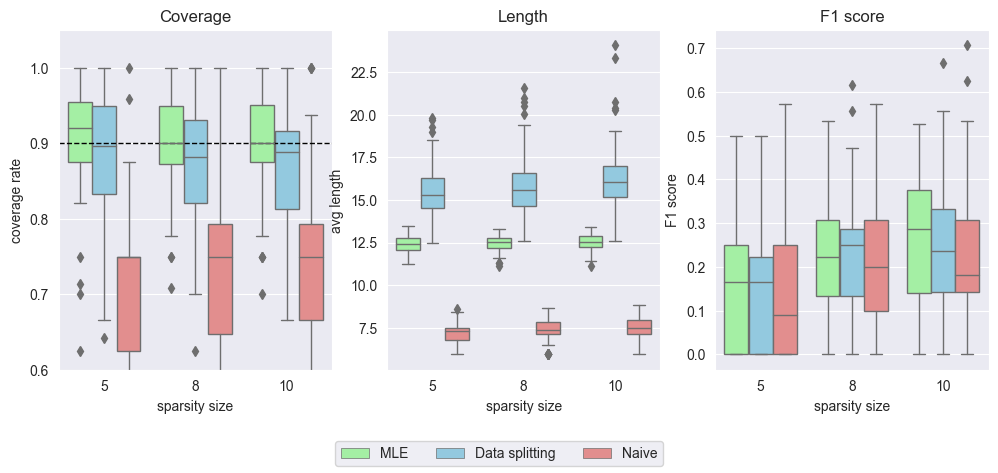

In [16]:
plotting('logis_vary_sparsity.csv')

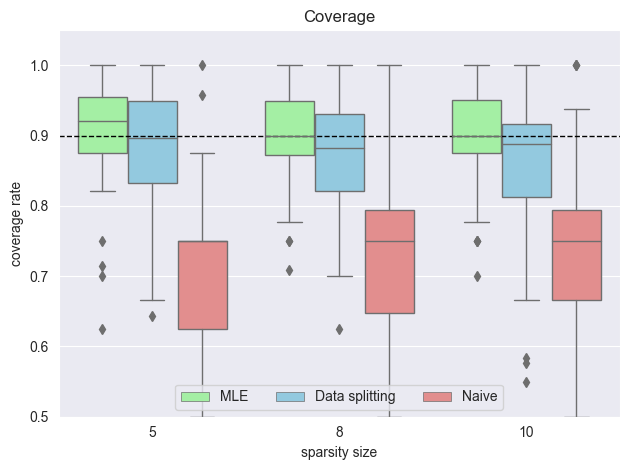

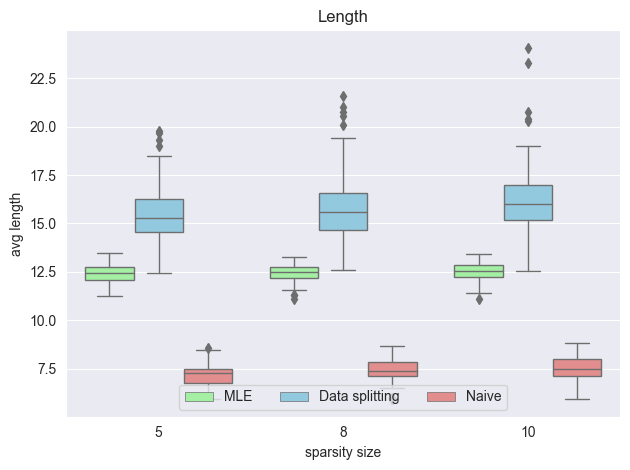

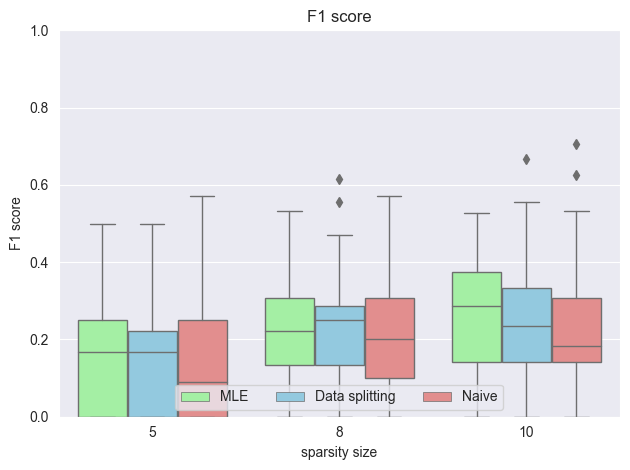

In [19]:
plotting_separate('logis_vary_sparsity.csv')

In [20]:
range = range(0,100)

In [21]:
range.start

0

In [22]:
range.stop

100

In [23]:
"aa" + str(range.stop)

'aa100'

In [24]:
'quasipois_CI_vary_sparsity' + str(range.start) + '_' + str(range.stop) + '.csv'

'quasipois_CI_vary_sparsity0_100.csv'